
## Script to Visualize In-Situ Beach Width (BWins) data and calculate mean slope for comparison with CS.Slope slopes

This code loads beach slopes and beach width data obtained from systematic surveys of beach profiles on multiple sites along the Buenos Aires Atlantic Coast: Punta Rasa (PR), Mar del Tuyú (MDT), Mar de Ajó (MDA), Nueva Atlantis (NA), Pinamar (PI), and Mar de las Pampas (MDP). Visualizes the results and obtains average slope for each site for later comparison with the one obtained from satellites.


In [1]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

In [2]:
# Set the base directory and specify the path for in-situ data
base_dir = os.getcwd()
dir_in_situ = os.path.join(base_dir, 'In Situ data')
dir_slopes = os.path.join(base_dir, 'Slopes')
# Load beach width (bw) and slope data from pickle files
with open(os.path.join(dir_in_situ, 'in_situ_bw.pkl'), 'rb') as f:
    bw = pickle.load(f)

with open(os.path.join(dir_in_situ, 'in_situ_slope.pkl'), 'rb') as f:
    slope = pickle.load(f)

In [3]:
# Initialize dictionaries to store the mean and standard deviation of slope per site
slope_means = {}
slope_stds = {}

# Calculate the mean and standard deviation of slope for each site
for site in slope.keys():
    # Retrieve calculated slope values for the current site
    slope_site = slope[site]['slopes']
    
    # Calculate the mean and standard deviation of slope, ignoring NaNs
    slope_mean = np.nanmean(slope_site).round(3)
    slope_std = np.nanstd(slope_site).round(3)

    print(f"Mean slope for {site}: {slope_mean}")
    print(f"Std for {site}: {slope_std}")

    # Store the mean and std values in dictionaries
    slope_means[site] = slope_mean
    slope_stds[site] = slope_std

# Save the mean slopes to a pickle file
ruta_pickle = os.path.join(dir_slopes, 'in_situ_mean_slope.pkl')
with open(ruta_pickle, 'wb') as f:
    pickle.dump(slope_means, f)

Mean slope for PR: -0.026
Std for PR: 0.011
Mean slope for MDT: -0.023
Std for MDT: 0.008
Mean slope for MDA: -0.025
Std for MDA: 0.006
Mean slope for NA: -0.026
Std for NA: 0.006
Mean slope for PI: -0.044
Std for PI: 0.017
Mean slope for MDP: -0.046
Std for MDP: 0.018


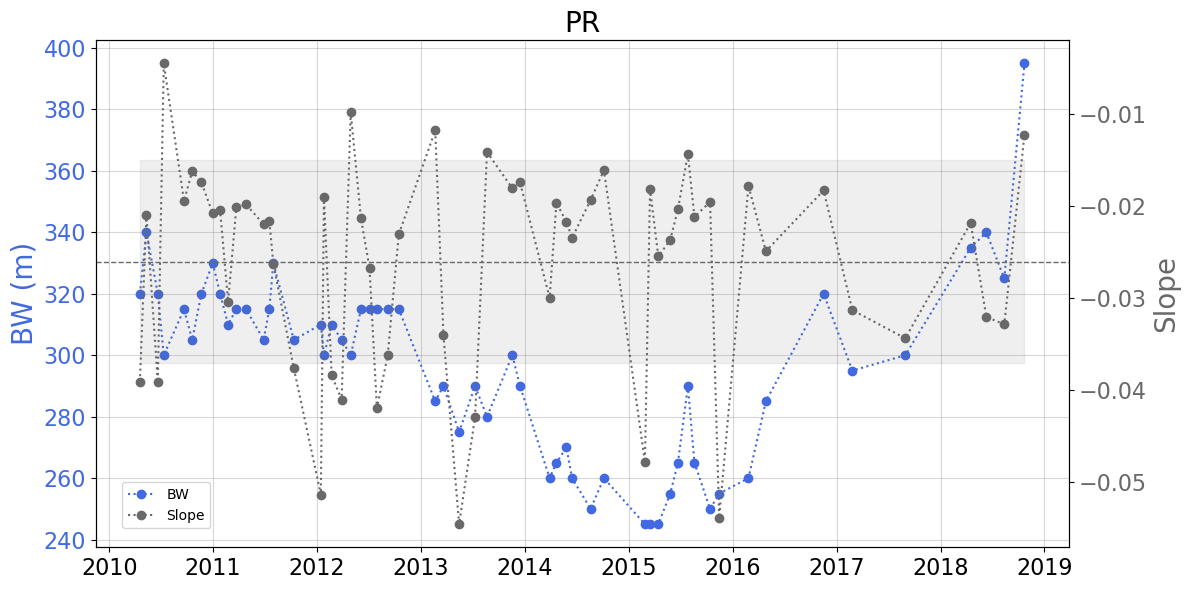

In [4]:
# Set the site for plotting (change this variable to plot data for a different site)
site = 'PR'

# Convert dates in the bw data to datetime format
bw[site]['date'] = pd.to_datetime(bw[site]['date'])

# Retrieve mean and standard deviation of slope for the selected site
slope_mean = slope_means[site]
slope_std = slope_stds[site]

# Create figure and axis for plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot beach width (bw) data
ax1.plot(bw[site]['date'], bw[site]['bw_ins'], ':o', color='royalblue', label='BW')
ax1.set_ylabel('BW (m)', fontsize=20, color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue')
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.xaxis.set_major_locator(mdates.YearLocator())

# Create a second y-axis for slope data
ax2 = ax1.twinx()
ax2.plot(slope[site]['date'], slope[site]['slopes'], ':o', color='dimgrey', label='Slope')
ax2.set_xlabel('Dates', fontsize=20)
ax2.set_ylabel('Slope', fontsize=20, color='dimgrey')
ax2.tick_params(axis='y', labelcolor='dimgrey')
ax2.tick_params(axis='both', which='major', labelsize=16)

# Add a dashed horizontal line for the mean slope and shade the standard deviation range
ax2.axhline(slope_mean, color='dimgrey', linestyle='--', linewidth=1)
ax2.fill_between(slope[site]['date'], slope_mean - slope_std, slope_mean + slope_std, color='dimgrey', alpha=0.1)

# Add title and legend
plt.title(site, fontsize=20)
ax1.grid(alpha=0.5)

fig.legend(loc='lower left', bbox_to_anchor=(0.1, 0.1))
fig.tight_layout()

# Save the figure with the site name in the file path
plt.savefig(os.path.join(dir_in_situ, f'slope and width {site}.png'), dpi=200)
